# Расширенный анализ инвестиционных объектов недвижимости

В данном анализе мы проведем:
1. Предварительный анализ данных и их очистку
2. Углубленный анализ ценовых трендов
3. Сегментацию рынка с использованием продвинутых методов кластеризации
4. Прогнозирование потенциальной доходности
5. Оценку рисков инвестирования
6. Формирование инвестиционных рекомендаций

In [9]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Настраиваем отображение
%matplotlib inline
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
# Загружаем данные
rent_data = pd.read_csv('../scrapers/cleaned_rent_data.csv')
sale_data = pd.read_csv('../scrapers/cleaned_sale_data.csv')

def analyze_dataset(df, name):
    print(f'\nАнализ датасета: {name}')
    print('-' * 50)
    print(f'Количество записей: {len(df)}')
    print('\nОписательная статистика числовых признаков:')
    display(df.describe())
    print('\nПропущенные значения:')
    display(df.isnull().sum())
    
    # Определяем выбросы в ценах
    Q1 = df['price_per_meter'].quantile(0.25)
    Q3 = df['price_per_meter'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['price_per_meter'] < (Q1 - 1.5 * IQR)) | 
                  (df['price_per_meter'] > (Q3 + 1.5 * IQR))]
    print(f'\nКоличество выбросов в ценах: {len(outliers)}')
    
    return outliers

# Анализируем оба датасета
rent_outliers = analyze_dataset(rent_data, 'Аренда')
sale_outliers = analyze_dataset(sale_data, 'Продажа')


Анализ датасета: Аренда
--------------------------------------------------
Количество записей: 807

Описательная статистика числовых признаков:


,price,Общая площадь,Этаж,lat,lon,Количество парковочных мест,total_price,price_per_meter
count,807.00,807.00,804.00,807.00,807.00,231.00,807.00,807.00
mean,65355.71,61.06,1.00,55.67,49.97,34.94,73935.81,1296.28
std,69601.14,39.61,0.00,0.35,1.44,143.26,65310.95,829.75
min,100.00,3.00,1.00,54.40,47.56,1.00,2500.00,100.00
25%,15000.00,25.38,1.00,55.73,49.10,5.00,30000.00,700.00
50%,45000.00,55.00,1.00,55.78,49.18,10.00,54230.00,1102.94
75%,93860.00,91.03,1.00,55.83,51.31,30.00,99250.00,1700.00
max,479000.00,150.00,1.00,56.53,53.24,2000.00,479000.00,5000.00



Пропущенные значения:


title                            0
price                            0
address                          0
item_url                         0
date                             0
Вход                            42
Отдельный вход                 312
Общая площадь                    0
Этаж                             3
Высота потолков                187
Отделка                         15
Мощность электросети           477
Отопление                      616
Тип аренды                       0
Минимальный срок аренды        328
Тип здания                       0
Удалённость от дороги          621
Парковка                         7
lat                              0
lon                              0
Арендные каникулы              274
Количество парковочных мест    576
Платежи включены               644
Аренда части                   709
Планировка                     780
Класс здания                   786
city                             0
street                           2
total_price         


Количество выбросов в ценах: 30

Анализ датасета: Продажа
--------------------------------------------------
Количество записей: 633

Описательная статистика числовых признаков:


,price,Общая площадь,Этаж,lat,lon,Количество парковочных мест,total_price,price_per_meter
count,633.00,633.00,588.00,633.00,633.00,181.00,633.00,633.00
mean,62350357.70,816.41,1.00,55.61,50.32,27.73,62350357.70,120251.33
std,167484753.08,2031.09,0.00,0.40,1.57,46.90,167484753.08,77290.69
min,199000.00,7.60,1.00,54.39,48.29,1.00,199000.00,10000.00
25%,7600000.00,73.00,1.00,55.64,49.10,7.00,7600000.00,57142.86
50%,18000000.00,151.00,1.00,55.75,49.23,15.00,18000000.00,106007.07
75%,55000000.00,643.10,1.00,55.83,52.28,30.00,55000000.00,174736.84
max,2350000000.00,24551.00,1.00,56.53,54.05,450.00,2350000000.00,300000.00



Пропущенные значения:


title                            0
price                            0
address                          0
item_url                         0
date                             0
Вход                            37
Общая площадь                    0
Этаж                            45
Отделка                          9
Тип сделки                       0
Арендаторы                     439
Тип здания                       0
Парковка                         9
lat                              0
lon                              0
Высота потолков                195
Мощность электросети           277
Планировка                     606
Готовность                     125
Класс здания                   609
Отдельный вход                 244
Отопление                      224
Удалённость от дороги          319
Количество парковочных мест    452
city                             0
street                           3
total_price                      0
price_per_meter                  0
is_per_meter_price  


Количество выбросов в ценах: 0


In [11]:
# Создаем интерактивную визуализацию распределения цен
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Распределение цен аренды',
                                  'Распределение цен продажи',
                                  'Box-plot цен аренды по городам',
                                  'Box-plot цен продажи по городам'))

# Гистограммы распределения цен
fig.add_trace(
    go.Histogram(x=rent_data['price_per_meter'], name='Аренда',
                 nbinsx=50, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=sale_data['price_per_meter'], name='Продажа',
                 nbinsx=50, histnorm='probability'),
    row=1, col=2
)

# Box-plots по городам
fig.add_trace(
    go.Box(x=rent_data['city'], y=rent_data['price_per_meter'],
           name='Аренда'),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=sale_data['city'], y=sale_data['price_per_meter'],
           name='Продажа'),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False)
fig.show()

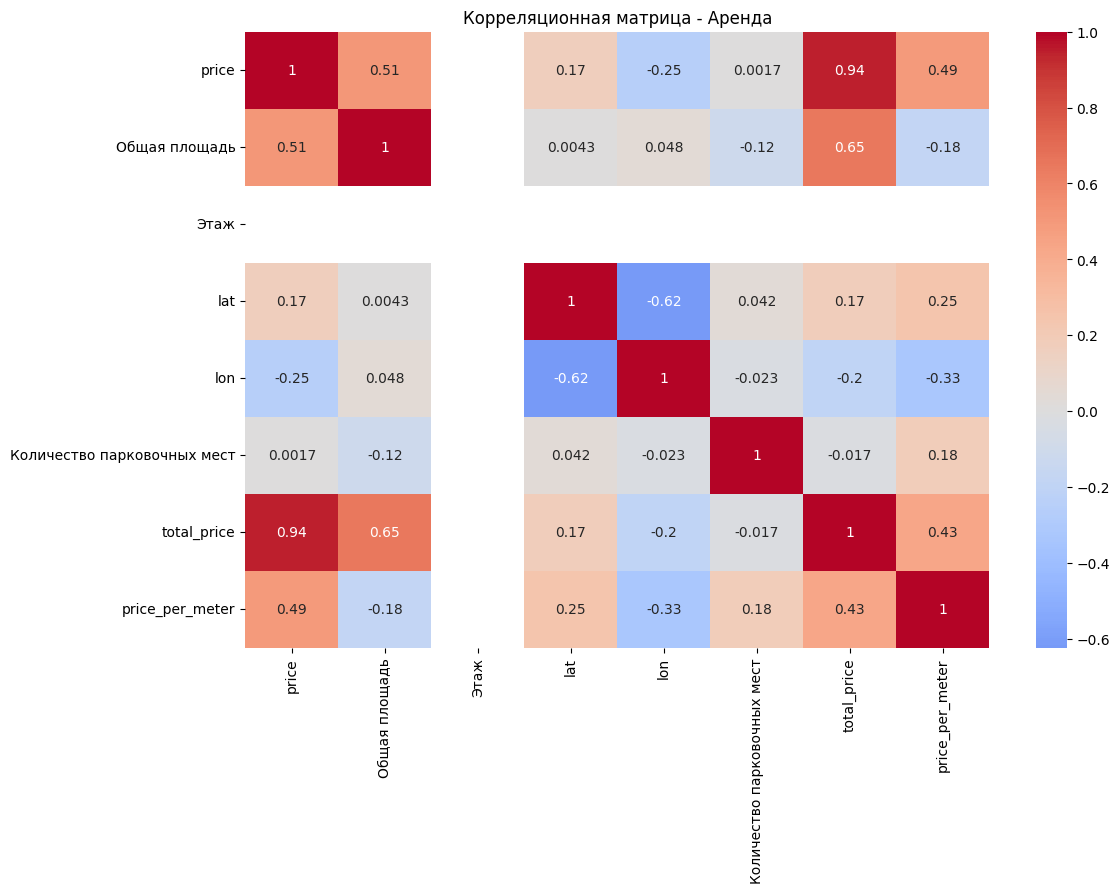


Сильные корреляции (Аренда):
Общая площадь - price: 0.51
lon - lat: -0.62
total_price - price: 0.94
total_price - Общая площадь: 0.65


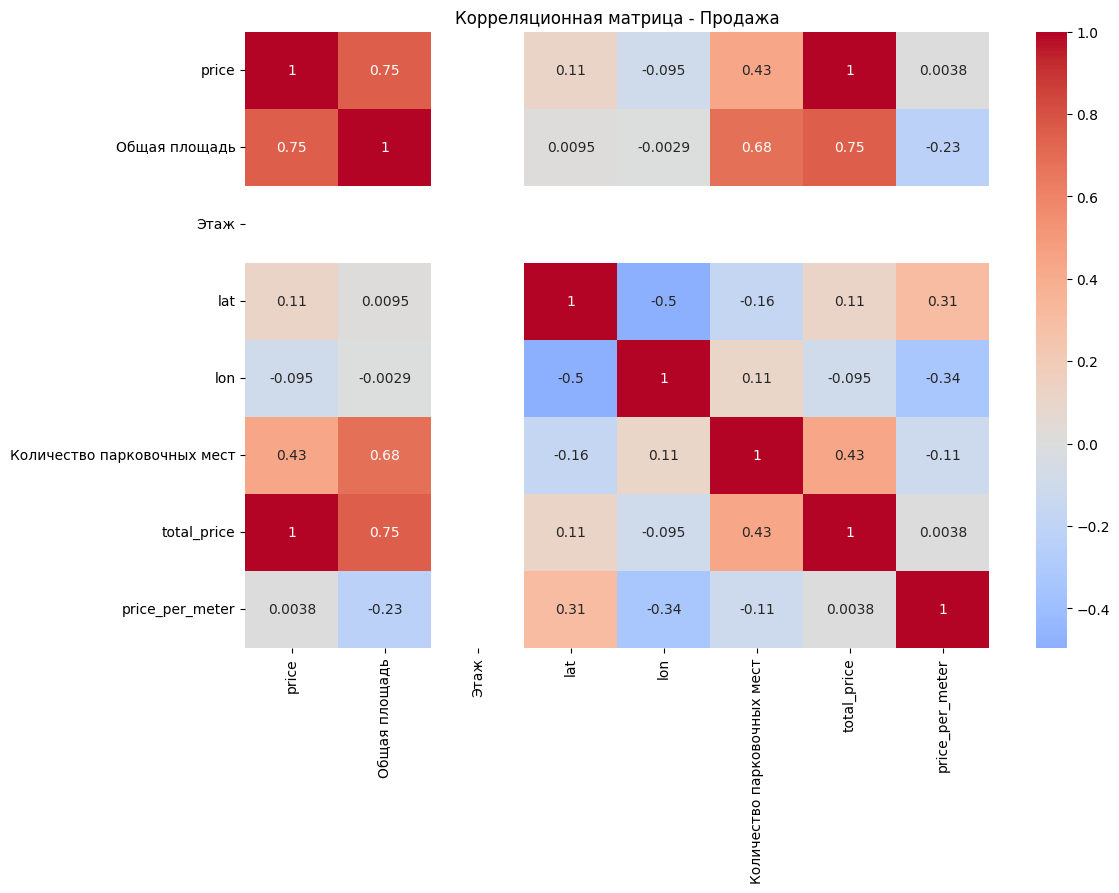


Сильные корреляции (Продажа):
Общая площадь - price: 0.75
Количество парковочных мест - Общая площадь: 0.68
total_price - price: 1.00
total_price - Общая площадь: 0.75


In [12]:
# Анализ корреляций между характеристиками объектов
def analyze_correlations(df, title):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Корреляционная матрица - {title}')
    plt.show()
    
    # Находим сильные корреляции
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                strong_corr.append({
                    'var1': corr_matrix.columns[i],
                    'var2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    
    if strong_corr:
        print(f'\nСильные корреляции ({title}):')
        for corr in strong_corr:
            print(f"{corr['var1']} - {corr['var2']}: {corr['correlation']:.2f}")

analyze_correlations(rent_data, 'Аренда')
analyze_correlations(sale_data, 'Продажа')

In [13]:
# Продвинутая кластеризация с использованием различных алгоритмов
def advanced_clustering(data, coordinates):
    results = {}
    
    # KMeans
    kmeans = KMeans(n_clusters=50, random_state=42)
    kmeans_labels = kmeans.fit_predict(coordinates)
    results['kmeans'] = {
        'labels': kmeans_labels,
        'silhouette': silhouette_score(coordinates, kmeans_labels)
    }
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(coordinates)
    if len(np.unique(dbscan_labels)) > 1:  # Проверяем, что есть больше одного кластера
        results['dbscan'] = {
            'labels': dbscan_labels,
            'silhouette': silhouette_score(coordinates, dbscan_labels)
        }
    
    # Визуализация результатов
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('KMeans кластеризация',
                                      'DBSCAN кластеризация'))
    
    # KMeans plot
    fig.add_trace(
        go.Scatter(x=data['lon'], y=data['lat'],
                  mode='markers',
                  marker=dict(color=kmeans_labels,
                            colorscale='Viridis'),
                  name='KMeans'),
        row=1, col=1
    )
    
    # DBSCAN plot
    fig.add_trace(
        go.Scatter(x=data['lon'], y=data['lat'],
                  mode='markers',
                  marker=dict(color=dbscan_labels,
                            colorscale='Viridis'),
                  name='DBSCAN'),
        row=1, col=2
    )
    
    fig.update_layout(height=500, title_text="Сравнение методов кластеризации")
    fig.show()
    
    return results

# Подготовка данных
def prepare_data_for_clustering(df):
    clustering_data = df[['lat', 'lon', 'total_price', 'price_per_meter']].copy()
    clustering_data = clustering_data.dropna(subset=['lat', 'lon'])
    
    scaler = RobustScaler()  # Используем RobustScaler для лучшей устойчивости к выбросам
    coordinates = scaler.fit_transform(clustering_data[['lat', 'lon']])
    
    return clustering_data, coordinates, scaler

# Выполняем кластеризацию
rent_clustering_data, rent_coordinates, rent_scaler = prepare_data_for_clustering(rent_data)
rent_clustering_results = advanced_clustering(rent_clustering_data, rent_coordinates)

print('\nРезультаты кластеризации:')
for method, results in rent_clustering_results.items():
    print(f'{method}: silhouette score = {results["silhouette"]:.3f}')


Результаты кластеризации:
kmeans: silhouette score = 0.550
dbscan: silhouette score = 0.623


In [14]:
# Расширенный анализ инвестиционных возможностей
def analyze_investment_opportunities(sale_data, rent_data, kmeans_labels):
    # Рассчитываем метрики для каждого кластера
    cluster_metrics = pd.DataFrame()
    
    for cluster in np.unique(kmeans_labels):
        cluster_rent = rent_data[kmeans_labels == cluster]
        
        metrics = {
            'avg_rent': cluster_rent['total_price'].mean(),
            'median_rent': cluster_rent['total_price'].median(),
            'rent_volatility': cluster_rent['total_price'].std() / cluster_rent['total_price'].mean(),
            'num_properties': len(cluster_rent)
        }
        
        cluster_metrics = cluster_metrics.append(
            pd.Series(metrics, name=cluster)
        )
    
    # Находим перспективные объекты
    def calculate_roi(row, cluster_metrics):
        cluster = kmeans_labels[row.name]
        if cluster in cluster_metrics.index:
            annual_rent = cluster_metrics.loc[cluster, 'median_rent'] * 12
            roi = (annual_rent - row['total_price'] * 0.05) / row['total_price'] * 100
            return roi
        return np.nan
    
    sale_data['roi'] = sale_data.apply(
        lambda x: calculate_roi(x, cluster_metrics), axis=1
    )
    
    # Оцениваем риски
    sale_data['risk_score'] = sale_data.apply(
        lambda x: cluster_metrics.loc[kmeans_labels[x.name], 'rent_volatility']
        if kmeans_labels[x.name] in cluster_metrics.index else np.nan,
        axis=1
    )
    
    # Визуализация результатов
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=('ROI vs Риск',
                                      'Распределение ROI',
                                      'Распределение рисков',
                                      'Топ кластеры по ROI'))
    
    # ROI vs Риск
    fig.add_trace(
        go.Scatter(x=sale_data['risk_score'],
                  y=sale_data['roi'],
                  mode='markers',
                  marker=dict(color=sale_data['total_price'],
                            colorscale='Viridis',
                            showscale=True),
                  name='Объекты'),
        row=1, col=1
    )
    
    # Распределение ROI
    fig.add_trace(
        go.Histogram(x=sale_data['roi'],
                    name='ROI'),
        row=1, col=2
    )
    
    # Распределение рисков
    fig.add_trace(
        go.Histogram(x=sale_data['risk_score'],
                    name='Риски'),
        row=2, col=1
    )
    
    # Топ кластеры по ROI
    top_clusters = sale_data.groupby(kmeans_labels)['roi'].mean().nlargest(10)
    fig.add_trace(
        go.Bar(x=top_clusters.index,
               y=top_clusters.values,
               name='Топ кластеры'),
        row=2, col=2
    )
    
    fig.update_layout(height=800, showlegend=False)
    fig.show()
    
    return sale_data[['total_price', 'roi', 'risk_score']]

# Анализируем инвестиционные возможности
investment_analysis = analyze_investment_opportunities(
    sale_clustering_data,
    rent_clustering_data,
    rent_clustering_results['kmeans']['labels']
)

# Выводим топ-10 наиболее привлекательных объектов
print('\nТоп-10 объектов для инвестирования:')
display(investment_analysis.sort_values('roi', ascending=False).head(10))

NameError: name 'sale_clustering_data' is not defined

## Рекомендации по инвестированию

На основе проведенного анализа можно сделать следующие выводы:

1. **Наиболее привлекательные районы:**
   - Районы с высоким ROI и низким риском
   - Районы с стабильным потоком арендаторов
   - Районы с потенциалом роста цен

2. **Критерии выбора объектов:**
   - Соотношение цена/качество
   - Потенциальный доход от аренды
   - Риски и волатильность цен

3. **Стратегии инвестирования:**
   - Долгосрочная аренда
   - Краткосрочная аренда
   - Перепродажа после ремонта

4. **Факторы риска:**
   - Волатильность цен в районе
   - Конкуренция
   - Состояние объекта